In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # Used to unzip a data set loaded to the drive
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/MotifGAN Capstone/Datasets/lick_40_720.zip") as z:
  z.extractall()

In [ ]:
import os

In [ ]:
if not os.path.isdir("spec"):
  os.mkdir("spec")
# os.rename("solo_lick_specs", "spec")
os.rename("positive", "spec/positive")
os.rename("negative", "spec/negative")

positive_3ce906f4d05893ff3b8ee31f4a4b2195.mp3_stretched.wav_copy.mp3_noisy_1.png
negative_c21df5150b1ea0a11756c62c84dcfd51.mp3_trimmed.mp3_copy.wav_distorted_0.mp3_copy.png


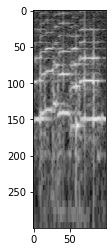

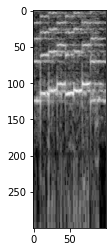

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pos_img_name = random.choice(os.listdir('./spec/positive'))
neg_img_name = random.choice(os.listdir('./spec/negative'))

print(pos_img_name)
pos_img = mpimg.imread(f'./spec/positive/{pos_img_name}')
plt.figure()
plt.imshow(pos_img)
print(neg_img_name)
neg_img = mpimg.imread(f'./spec/negative/{neg_img_name}')
plt.figure()
plt.imshow(neg_img)

## Make datasets

In [ ]:
# randomly set aside some examples for validation

os.makedirs("val/positive")
os.makedirs("val/negative")

for category in os.listdir("spec"):
  for f in os.listdir(f"spec/{category}"):
    if random.uniform(0,1) < 0.2:
      os.rename(f"spec/{category}/{f}", f"val/{category}/{f}")

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load dataset from directory with keras

# sometimes a directory called .ipynb_checkpoints is present, remove it if so
if os.path.isdir('./spec/.ipynb_checkpoints'):
  os.removedirs("./spec/.ipynb_checkpoints")

train_dir = './spec/'
val_dir = './val'
BATCH_SIZE = 8

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE, 
    image_size=(100,300),
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE, 
    image_size=(100,300),
    seed=123
)

class_names = train_ds.class_names
print(class_names)

Found 1162 files belonging to 2 classes.
Found 277 files belonging to 2 classes.
['negative', 'positive']


In [ ]:
# with zipfile.ZipFile("/content/drive/MyDrive/MotifGAN Capstone/manymotifcnn_v3_10ep_0.005lr.tf.zip") as z:
#   z.extractall()

In [ ]:
motifcnn_dir = "drive/MyDrive/MotifGAN Capstone/Models/manymotifcnn_v5_32x16_10ep_0.0005lr.tf"
# motifcnn_dir = "motifcnn_big.tf"
# shutil.move(motifcnn_dir_origin, motifcnn_dir)
try:
  os.mkdir(motifcnn_dir)
except:
  print("already exists probably")

already exists probably


In [ ]:
# os.rename("assets", f"{motifcnn_dir}/assets")
# os.rename("variables", f"{motifcnn_dir}/variables")
# os.rename("keras_metadata.pb", f"{motifcnn_dir}/keras_metadata.pb")
# os.rename("saved_model.pb", f"{motifcnn_dir}/saved_model.pb")

In [ ]:
big_model = keras.models.load_model(motifcnn_dir)

In [ ]:
big_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 50, 150, 64)       9408      
                                                                 
 batch_normalization_11 (Bat  (None, 50, 150, 64)      256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 50, 150, 64)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 75, 64)       0         
 2D)                                                             
                                                                 
 residual_unit_4 (ResidualUn  (None, 25, 75, 64)       74240     
 it)                                                             
                                                      

In [ ]:
model = keras.models.Sequential()
for layer in big_model.layers[:-3]:
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 50, 150, 64)       9408      
                                                                 
 batch_normalization_11 (Bat  (None, 50, 150, 64)      256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 50, 150, 64)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 75, 64)       0         
 2D)                                                             
                                                                 
 residual_unit_4 (ResidualUn  (None, 25, 75, 64)       74240     
 it)                                                             
                                                        

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
# for i in range(3):
#   model.layers[-i].trainable = True

In [ ]:
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid", name="new_dense"))

In [ ]:
# model.layers[-5].trainable = True

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 50, 150, 64)       9408      
                                                                 
 batch_normalization_11 (Bat  (None, 50, 150, 64)      256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 50, 150, 64)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 75, 64)       0         
 2D)                                                             
                                                                 
 residual_unit_4 (ResidualUn  (None, 25, 75, 64)       74240     
 it)                                                             
                                                        

In [ ]:
initial_weights = model.get_weights()

In [ ]:
# only run if you want to retrain
model.set_weights(initial_weights)

In [ ]:
learning_rate = 0.0005

loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['acc']
model.compile(optimizer, loss_fn, metrics)

In [ ]:
# Set the epochs
epochs = 2
print('\nFitting:')

# Train the model.
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=BATCH_SIZE)


Fitting:
Epoch 1/2
146/146 [==============================] - 13s 19ms/step - loss: 0.3511 - acc: 0.8898 - val_loss: 0.0972 - val_acc: 0.9675
Epoch 2/2
146/146 [==============================] - 3s 17ms/step - loss: 0.0453 - acc: 0.9854 - val_loss: 0.1367 - val_acc: 0.9531


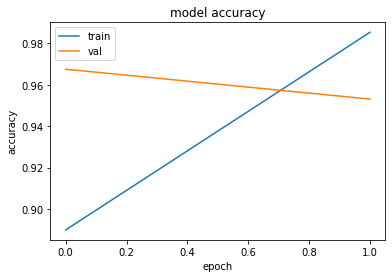

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Save Model to Google Drive

In [ ]:
model_name = f"transfer_solo_v4_{epochs}ep_{learning_rate}lr.tf"
save_path = f"drive/MyDrive/MotifGAN Capstone/Models/{model_name}"
if os.path.exists(save_path):
  print("output path exists already")
else:
  model.save(f"drive/MyDrive/MotifGAN Capstone/Models/{model_name}")

model_name

INFO:tensorflow:Assets written to: drive/MyDrive/MotifGAN Capstone/Models/transfer_solo_v4_2ep_0.0005lr.tf/assets


INFO:tensorflow:Assets written to: drive/MyDrive/MotifGAN Capstone/Models/transfer_solo_v4_2ep_0.0005lr.tf/assets


'transfer_solo_v4_2ep_0.0005lr.tf'